In [1]:
import cv2
import os
import copy
import numpy as np
from matplotlib import pyplot as plt
import skimage
from skimage.feature import canny
from skimage.morphology import remove_small_objects, remove_small_holes
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line, rotate
import math
from scipy import ndimage
from matplotlib.path import Path
from binarization import *
from character import *
from skewcorrection import *
from segmentation import *
from assemble import *

In [48]:
with open('../chars_list.txt','r') as f:
    data = f.read().replace('\n',',')
    chars_list = list(data.split(","))[1::2]

id_profs_list = np.load("./id_profs_list.npy")

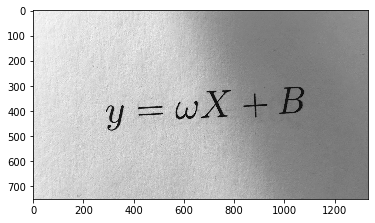

Photograph
255


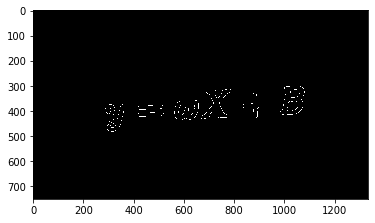

[87, 87, 88, 89]
-1


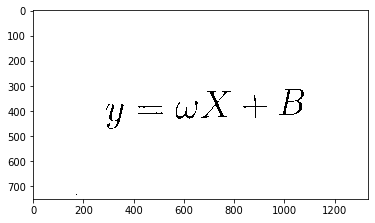

ign_ind []
[  776   784  6177  7100  8930 10290 12744]


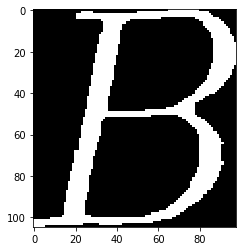

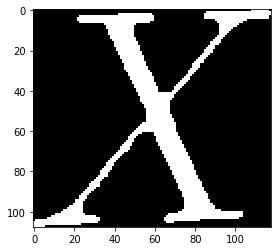

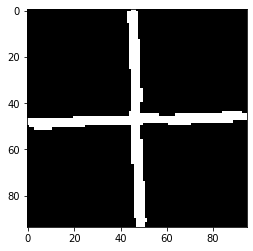

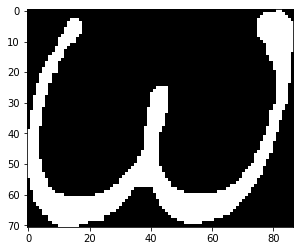

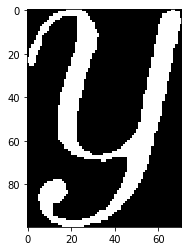

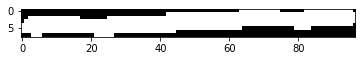

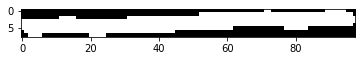

[51.758730158730145, 53.94722222222231]
[53.48375451263536, 60.96074007220216]
[47.211822660098505, 46.650246305418705]
[43.82017543859649, 42.20394736842104]
[46.150751072961384, 36.3320815450644]
[3.2691511387163814, 47.881987577639734]
[3.4909502262443652, 48.30090497737558]
1225 10290
hi
1072 12744
hi
96 8930
hi
581 6177
hi
892 7100
hi
144 776
65 784
hi
['B', 'X', '+', 'omega', 'y', '-', '-']
hi there
[[980. 669. 837. 568. 290. 418. 419.]
 [312. 320. 335. 361. 372. 379. 406.]
 [ 98. 118.  95.  87.  71.  97.  98.]
 [105. 108.  94.  71. 100.   8.   8.]]
['B', 'X', '+', 'omega', 'y', '-', '-'] [4 5 6 3 1 2 0] [[ 363.75873016  373.48375451  382.21182266  404.82017544  418.15075107
   382.26915114  409.49095023]
 [1033.94722222  729.96074007  883.65024631  610.20394737  326.33208155
   465.88198758  467.30090498]] aaa
['y', '-', '-', 'omega', 'X', '+', 'B'] herehere
[[290. 418. 419. 568. 669. 837. 980.]
 [372. 379. 406. 361. 320. 335. 312.]
 [ 71.  97.  98.  87. 118.  95.  98.]
 [100.  

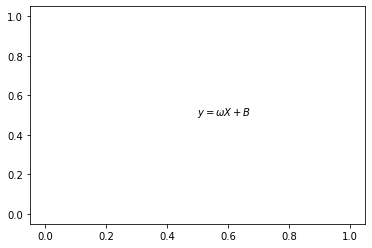

In [100]:
img = cv2.imread("../input/Equations/Images/eq1_hr.jpg",0)
plt.imshow(img,cmap='gray')
plt.show()
new_img = binarize_input(img)
if find_scan_screenshot(img)==1:
    img_rotated = skew_correction(new_img)
else :
    img_rotated = skew_correction_scanned(new_img)
img_rotated[img_rotated==1] = 255
plt.imshow(img_rotated,cmap='gray')
plt.show()
centroids, bboxs, convex_hulls,imgs = segmentation(img_rotated)
for i in range(0,len(imgs)):
    plt.imshow(imgs[i],cmap='gray')
    plt.show()
centroids_new = create_new_centroids(centroids, bboxs, imgs)

detected_chars = []
if find_scan_screenshot(img)==1:
    for i in range(0,len(imgs)):
        after_and = copy.deepcopy(imgs[i])
        str_ele = skimage.morphology.selem.disk(2)
        after_and = skimage.morphology.binary_erosion(after_and,selem=str_ele)
        new_and = copy.deepcopy(after_and)
        print(np.sum(new_and),new_and.size)
        if np.sum(new_and)<0.15*new_and.size:
            print("hi")
            min_ind = find_nn_srikar(imgs[i],centroids_new[i],id_profs_list)
        elif new_and.shape[0]<20:
            min_ind = 100
        else:
            min_ind = find_nn_srikar(after_and,centroids_new[i],id_profs_list)
        detected_chars.append(chars_list[min_ind])
else : 
    for i in range(0,len(imgs)):
        str_ele = skimage.morphology.selem.square(3)
        after_and = imgs[i]
        min_ind = find_nn_srikar(after_and,centroids_new[i],id_profs_list)
        detected_chars.append(chars_list[min_ind])

print(detected_chars)

eq = assemble_eqn(get_boxes(bboxs),get_centroids(centroids), detected_chars)
print(eq)
a = eq
plt.plot()
plt.text(0.5,0.5,'$%s$'%a)
plt.show()

233 879 351 1019


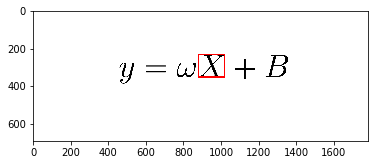

3060
233 1237 351 1357


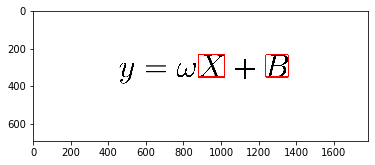

2820
254 1074 362 1182


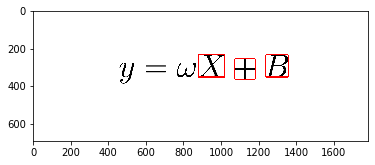

2556
275 461 386 539


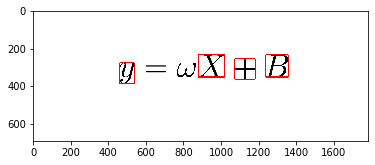

2232
275 766 353 866


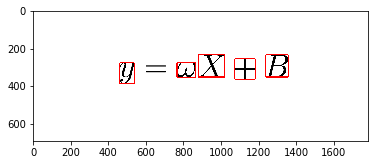

2100
289 600 296 708


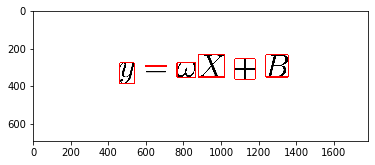

1344
320 600 326 708


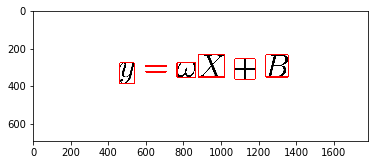

1332


In [99]:

im = skimage.color.gray2rgb(copy.deepcopy(img))
def func(x,y,w,h,shape):
    print(x,y,w,h)
    a = np.zeros(shape)
    a[x:w,y-3:y+3] = 255
    a[x:w,h-3:h+3] = 255
    a[x-3:x+3,y:h] = 255
    a[w-3:w+3,y:h] = 255
    return a.astype(np.bool)
for i in bboxs:
    x,y,w,h = i[0],i[1],i[2],i[3]
    a = func(x,y,w,h,im.shape[:2])
    im[a,0] = 255
    im[a,1] = 0
    im[a,2] = 0
    plt.imshow(im)
    plt.show()
    print(a.sum())